<a href="https://colab.research.google.com/github/anjha1/Data-Science/blob/main/Python/133.%20Multiple%20Linear%20Regression/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
from sklearn.datasets import fetch_california_housing

In [135]:
import sklearn
print(sklearn.__version__)


1.5.2


In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
california=fetch_california_housing()
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [138]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [139]:
california.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S

In [140]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [141]:
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [142]:
california.data.shape

(20640, 8)

In [143]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [144]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [145]:
california.target_names

['MedHouseVal']

In [146]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

# **Lets prepare the DataSet**

In [147]:
dataset=pd.DataFrame(california.data,columns=california.feature_names)

In [148]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [149]:
dataset['Price']=california.target

In [150]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [151]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [152]:
dataset.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [153]:
dataset.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [154]:
dataset.duplicated().sum()

0

In [155]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [156]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [157]:
dataset.corr(method='spearman')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.147308,0.643671,-0.252426,0.006268,-0.044171,-0.088029,-0.009928,0.676778
HouseAge,-0.147308,1.000000,-0.231409,-0.120981,-0.283879,-0.024833,0.032440,-0.150752,0.074855
AveRooms,0.643671,-0.231409,1.000000,0.082046,-0.105385,0.018807,0.127134,-0.044783,0.263367
AveBedrms,-0.252426,-0.120981,0.082046,1.000000,0.027027,-0.132315,0.047197,0.010884,-0.125187
Population,0.006268,-0.283879,-0.105385,0.027027,1.000000,0.242337,-0.123626,0.123527,0.003839
AveOccup,-0.044171,-0.024833,0.018807,-0.132315,0.242337,1.000000,-0.150954,0.181468,-0.256594
Latitude,-0.088029,0.032440,0.127134,0.047197,-0.123626,-0.150954,1.000000,-0.879203,-0.165739
Longitude,-0.009928,-0.150752,-0.044783,0.010884,0.123527,0.181468,-0.879203,1.000000,-0.069667
Price,0.676778,0.074855,0.263367,-0.125187,0.003839,-0.256594,-0.165739,-0.069667,1.000000


<Axes: >

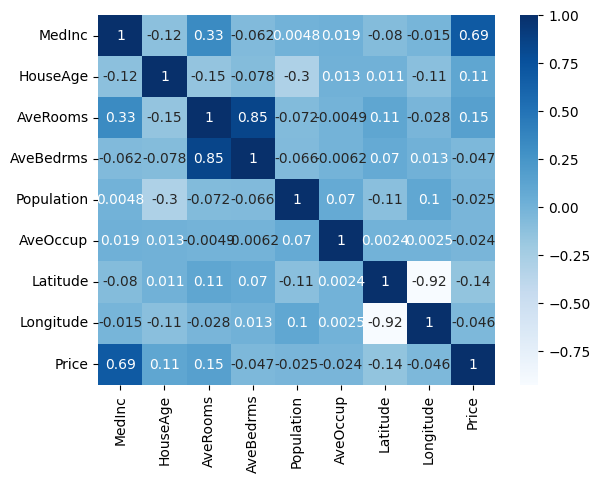

In [158]:
sns.heatmap(dataset.corr(),annot=True,cmap='Blues')

In [159]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# **independent and dependent feature**

In [160]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [161]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [162]:
y.head()

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [163]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [164]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((13828, 8), (6812, 8), (13828,), (6812,))

In [165]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

**Model Traning**

In [166]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [167]:
regression.coef_

array([ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
       -0.02810091, -0.93017985, -0.89505497])

In [168]:
regression.intercept_

2.0634768086491184

# **Cost Function**

In [169]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,regression.predict(X_test_scaled))
mae=mean_absolute_error(y_test,regression.predict(X_test_scaled))
rmse=np.sqrt(mse)
print('Mean Squared Error:',mse)
print('Mean Absolute Error:',mae)
print('Root Mean Squared Error:',rmse)

Mean Squared Error: 0.5522332399363619
Mean Absolute Error: 0.5371056943007959
Root Mean Squared Error: 0.7431239734636219


## **Performance matrix**

In [170]:
from sklearn.metrics import r2_score
r2_score(y_test,regression.predict(X_test_scaled))


0.593595852643664

In [171]:
adjusted_r_squared=1-(1-r2_score(y_test,regression.predict(X_test_scaled)))*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)
adjusted_r_squared

0.5931179409607519

**Pickling**

The Python `pickle` module is used for serializing and deserializing Python objects. Serialization, or "pickling," is the process of converting a Python object (like a list, dictionary, etc.) into a byte stream, which can then be saved to disk. This serialized byte stream contains all the information necessary to recreate the object in another Python script or session.

With pickling, you can easily save Python objects to a file and then later load them back into a program, restoring their state and structure. This makes it convenient for data persistence and object sharing across different programs.

In [172]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))
pickle.dump(regression,open('regmodel.pkl','wb'))

In [173]:
model_regressor=pickle.load(open('regmodel.pkl','rb'))
model_regressor.predict(X_test_scaled)

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

In [174]:
standerd_scaller=pickle.load(open('scaling.pkl','rb'))
model_regressor.predict(standerd_scaller.transform(X_test))

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

In [175]:
dataset.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')

In [176]:
import requests
import numpy as np
# NOTE: Set your API key here
import getpass
API_KEY = str(getpass.getpass("Enter your API KEY: "))
token_response = requests.post(
    'https://iam.cloud.ibm.com/identity/token',
    data={"apikey": API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'}
)
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# Convert X_test_scaled to list if it is a numpy array
if isinstance(X_test_scaled, np.ndarray):
    X_test_scaled = X_test_scaled.tolist()  # Convert to list of lists

# Define the payload with structured input_data
payload_scoring = {
    "input_data": [
        {
            "fields": ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'],
            "values": X_test_scaled  # Ensure this is a list of lists
        }
    ]
}

# Send the scoring request
response_scoring = requests.post(
    'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/0f9f15c5-9fc2-4d1c-a129-0c0f63bf0c09/predictions?version=2021-05-01',
    json=payload_scoring,
    headers={'Authorization': 'Bearer ' + mltoken}
)

print("Scoring response")
print(response_scoring.json())


Enter your API KEY: ··········
Scoring response
{'predictions': [{'fields': ['prediction'], 'values': [[3.0039748485778723], [2.580114860650682], [2.348907696832474], [1.7154618960296504], [1.7401665755973021], [0.7582920637377701], [2.1828214421896397], [2.2559677350337513], [1.1757246607523795], [3.3961024669901674], [1.3880653386305948], [1.9124682996589772], [2.4337699991941344], [1.1714967302740673], [1.4058184574882675], [1.220676491128154], [1.7133474428421565], [2.7207334542178847], [2.3678463722210523], [1.0002201086947047], [4.983206133619925], [1.206685980619532], [2.5038836872448003], [1.4820396462919088], [3.2886590003300715], [1.6434192184773566], [2.5690366350539717], [3.104808647762488], [1.9355315474401888], [1.0391400527827785], [2.3234119088966194], [1.1281660856584408], [2.273419023058577], [1.637486939317895], [1.6618402636428296], [2.0861390322158835], [3.060271963747126], [0.3556995523020392], [1.8982204957912843], [1.6575133933706043], [1.1126104765733864], [4.2

In [178]:
import requests
import numpy as np
import getpass

# Set your API key here
API_KEY = str(getpass.getpass("Enter your API KEY: "))

# Get the authentication token from IBM
token_response = requests.post(
    'https://iam.cloud.ibm.com/identity/token',
    data={"apikey": API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'}
)
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# Function to take input from the user
def get_user_input():
    MedInc = float(input("Enter the MedInc: "))
    HouseAge = float(input("Enter the HouseAge: "))
    AveRooms = float(input("Enter the AveRooms: "))
    AveBedrms = float(input("Enter the AveBedrms: "))
    Population = float(input("Enter the Population: "))
    AveOccup = float(input("Enter the AveOccup: "))
    Latitude = float(input("Enter the Latitude: "))
    Longitude = float(input("Enter the Longitude: "))

    return [[MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]]

# Get the user's input data
X_test_scaled = get_user_input()

# Define the payload with structured input_data
payload_scoring = {
    "input_data": [
        {
            "fields": ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'],
            "values": X_test_scaled  # Ensure this is a list of lists
        }
    ]
}

# Send the scoring request
response_scoring = requests.post(
    'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/0f9f15c5-9fc2-4d1c-a129-0c0f63bf0c09/predictions?version=2021-05-01',
    json=payload_scoring,
    headers={'Authorization': 'Bearer ' + mltoken}
)

# Check the response and extract the prediction
response_json = response_scoring.json()

# Assuming the response structure contains 'predictions' and 'values' (this may vary)
if 'predictions' in response_json and len(response_json['predictions']) > 0:
    predicted_value = response_json['predictions'][0]['values'][0][0]
    print(f"Your house price is: ${predicted_value:,.2f}")
else:
    print("Error: Unable to get a valid prediction from the model.")


Enter your API KEY: ··········
Enter the MedInc: 2.3886
Enter the HouseAge: 16.0
Enter the AveRooms: 5.254717
Enter the AveBedrms: 1.162264
Enter the Population: 1387.0
Enter the AveOccup: 2.616981
Enter the Latitude: 39.37
Enter the Longitude: -121.24
Your house price is: $79.76
